# Title: Predictive model for Energy Consumption and Electricity Generation

### 1. Import Packages


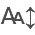

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go  #  is a lower-level interface for creating figures. 
import plotly.express as px        #   is a higher-level, more concise interface to create interactive plots quickly and with less code. 
import warnings
warnings.filterwarnings("ignore")
import itables
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

### 2. Read the Data

In [84]:
# read the data
data = pd.read_csv(r"C:\Users\Pranita\Downloads\World Energy Consumption.csv")

In [85]:
# get the shape
data.shape

(22012, 129)

We see the dataframe has 129 columns and 22012 observations

In [86]:
# print the first five rows of the data
data.head()

country  year iso_code  population  gdp  biofuel_cons_change_pct   
0  ASEAN (Ember)  2000      NaN         NaN  NaN                      NaN  \
1  ASEAN (Ember)  2001      NaN         NaN  NaN                      NaN   
2  ASEAN (Ember)  2002      NaN         NaN  NaN                      NaN   
3  ASEAN (Ember)  2003      NaN         NaN  NaN                      NaN   
4  ASEAN (Ember)  2004      NaN         NaN  NaN                      NaN   

   biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption   
0                      NaN                      NaN                  NaN  \
1                      NaN                      NaN                  NaN   
2                      NaN                      NaN                  NaN   
3                      NaN                      NaN                  NaN   
4                      NaN                      NaN                  NaN   

   biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy   
0                      NaN  ...               0.0                 NaN  \
1                      NaN  ...               0.0                 NaN   
2                      NaN  ...               0.0                 NaN   
3                      NaN  ...               0.0                 NaN   
4                      NaN  ...               0.0                 NaN   

   wind_cons_change_pct  wind_cons_change_twh  wind_consumption   
0                   NaN                   NaN               NaN  \
1                   NaN                   NaN               NaN   
2                   NaN                   NaN               NaN   
3                   NaN                   NaN               NaN   
4                   NaN                   NaN               NaN   

   wind_elec_per_capita  wind_electricity  wind_energy_per_capita   
0                   NaN               0.0                     NaN  \
1                   NaN               0.0                     NaN   
2                   NaN               0.0                     NaN   
3                   NaN               0.0                     NaN   
4                   NaN               0.0                     NaN   

   wind_share_elec  wind_share_energy  
0              0.0                NaN  
1              0.0                NaN  
2              0.0                NaN  
3              0.0                NaN  
4              0.0                NaN  

[5 rows x 129 columns]

In [87]:
# Define the structure of the CSV file by describing each column:

pd.read_csv(r"C:\Users\Pranita\Downloads\owid-energy-codebook.csv")

column   
0                   country  \
1                      year   
2                  iso_code   
3                population   
4                       gdp   
..                      ...   
124    wind_elec_per_capita   
125        wind_electricity   
126  wind_energy_per_capita   
127         wind_share_elec   
128       wind_share_energy   

                                           description   
0                       Country - Geographic location.  \
1                          Year - Year of observation.   
2    ISO code - ISO 3166-1 alpha-3 three-letter cou...   
3    Population - Population by country, available ...   
4    Gross domestic product (GDP) - This data is ad...   
..                                                 ...   
124  Electricity generation from wind power per per...   
125  Electricity generation from wind power - Measu...   
126  Wind power consumption per capita - Measured i...   
127  Share of electricity generated by wind power -...   
128  Share of primary energy consumption that comes...   

                               unit   
0                               NaN  \
1                               NaN   
2                               NaN   
3                           persons   
4    international-$ in 2011 prices   
..                              ...   
124                  kilowatt-hours   
125                  terawatt-hours   
126                  kilowatt-hours   
127                               %   
128                               %   

                                                source  
0                   Our World in Data - Regions (2023)  
1                   Our World in Data - Regions (2023)  
2    International Organization for Standardization...  
3    Population based on various sources (2023) [ht...  
4    Bolt and van Zanden - Maddison Project Databas...  
..                                                 ...  
124  Ember - Yearly Electricity Data (2024) [https:...  
125  Ember - Yearly Electricity Data (2024) [https:...  
126  Energy Institute - Statistical Review of World...  
127  Ember - Yearly Electricity Data (2024) [https:...  
128  Energy Institute - Statistical Review of World...  

[129 rows x 4 columns]

### 3. Data Cleaning

**In our dataset in the country column, there aren't just countries but so many different political groups, continents, 
deemed to be countries or special status regions included which we have to find and remove as we our scope in this project is limited to countries only**

In [88]:
data.country.unique().tolist()

['ASEAN (Ember)',
 'Afghanistan',
 'Africa',
 'Africa (EI)',
 'Africa (Ember)',
 'Africa (Shift)',
 'Albania',
 'Algeria',
 'American Samoa',
 'Angola',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Asia & Oceania (EIA)',
 'Asia (Ember)',
 'Asia Pacific (EI)',
 'Asia and Oceania (Shift)',
 'Australia',
 'Australia and New Zealand (EIA)',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'CIS (EI)',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central & South America (EIA)',
 'Central African Republic',
 'Central America (EI)',
 'Central and South America (Shift)',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croa

In [89]:
    # Filter out entries representing political groups, continents, or entities deemed to be countries 
    # or special status regions, as they are not relevant for our analysis or dataset.

data = data[~data.country.isin(["ASEAN (Ember)",'Africa (EI)',"Africa (Ember)","Africa (Shift)","Antarctica","Asia","Asia & Oceania (EIA)","Asia (Ember)",
                             "Asia Pacific (EI)","Asia and Oceania (Shift)","Australia and New Zealand (EIA)","CIS (EI)",
                             "Central & South America (EIA)","Central America (EI)","Central and South America (Shift)",
                            "EU28 (Shift)","East Germany (EIA)","East Timor","Eastern Africa (EI)",
                            "Eurasia (EIA)","Eurasia (Shift)","Europe","Europe (EI)""Europe (Ember)","Europe (Shift)","European Union (27)",
                            "European Union (EIA)","Falkland Islands","Faroe Islands","French Guiana","French Polynesia","G20 (Ember)",
                             "G7 (Ember)","Hawaiian Trade Zone (EIA)","High-income countries","IEO - Africa (EIA)","IEO - Middle East (EIA)",
                             "IEO OECD - Europe (EIA)","Latin America and Caribbean (Ember)","Low-income countries", "Lower-middle-income countries",
                             "Mexico, Chile, and other OECD Americas (EIA)","Micronesia (country)","Middle Africa (EI)","Middle East (EI)",
                             "Middle East (EIA)","Middle East (Ember)","Middle East (Shift)","Netherlands Antilles","New Caledonia","Non-OECD (EI)",
                             "Non-OECD (EIA)","Non-OPEC (EI)","Non-OPEC (EIA)","North America","North America (EI)","North America (Ember)",
                             "North America (Shift)","OECD (EI)","OECD (EIA)","OECD (Ember)","OECD (Shift)","OECD - Asia And Oceania (EIA)",
                             "OECD - Europe (EIA)","OECD - North America (EIA)","OPEC (EI)","OPEC (EIA)","OPEC (Shift)","OPEC - Africa (EIA)",
                             "OPEC - South America (EIA)","Oceania","Oceania (Ember)","Other Non-OECD - America (EIA)","Other Non-OECD - Asia (EIA)",
                             "Other Non-OECD - Europe and Eurasia (EIA)","Persian Gulf (EIA)","Persian Gulf (Shift)","Reunion","Saint Helena",
                             "Saint Kitts and Nevis","Saint Lucia","Saint Pierre and Miquelon","Saint Vincent and the Grenadines","Sao Tome and Principe",
                             "South America","South Korea and other OECD Asia (EIA)","South Sudan","South and Central America (EI)","U.S. Pacific Islands (EIA)",
                             "U.S. Territories (EIA)","USSR","United States Pacific Islands (Shift)","United States Territories (Shift)",
                             "Upper-middle-income countries","Wake Island (EIA)","Wake Island (Shift)","West Germany (EIA)","Western Africa (EI)",
                             "Western Sahara","World",'Africa'])]

In [90]:
data.head()

country  year iso_code  population  gdp  biofuel_cons_change_pct   
23  Afghanistan  1900      AFG   4707744.0  NaN                      NaN  \
24  Afghanistan  1901      AFG   4751177.0  NaN                      NaN   
25  Afghanistan  1902      AFG   4802500.0  NaN                      NaN   
26  Afghanistan  1903      AFG   4861833.0  NaN                      NaN   
27  Afghanistan  1904      AFG   4921891.0  NaN                      NaN   

    biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption   
23                      NaN                      NaN                  NaN  \
24                      NaN                      NaN                  NaN   
25                      NaN                      NaN                  NaN   
26                      NaN                      NaN                  NaN   
27                      NaN                      NaN                  NaN   

    biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy   
23                      NaN  ...               NaN                 NaN  \
24                      NaN  ...               NaN                 NaN   
25                      NaN  ...               NaN                 NaN   
26                      NaN  ...               NaN                 NaN   
27                      NaN  ...               NaN                 NaN   

    wind_cons_change_pct  wind_cons_change_twh  wind_consumption   
23                   NaN                   NaN               NaN  \
24                   NaN                   NaN               NaN   
25                   NaN                   NaN               NaN   
26                   NaN                   NaN               NaN   
27                   NaN                   NaN               NaN   

    wind_elec_per_capita  wind_electricity  wind_energy_per_capita   
23                   NaN               NaN                     NaN  \
24                   NaN               NaN                     NaN   
25                   NaN               NaN                     NaN   
26                   NaN               NaN                     NaN   
27                   NaN               NaN                     NaN   

    wind_share_elec  wind_share_energy  
23              NaN                NaN  
24              NaN                NaN  
25              NaN                NaN  
26              NaN                NaN  
27              NaN                NaN  

[5 rows x 129 columns]

In [91]:
data.shape # reching rows after filter out entries representing political groups, continents, or entities deemed to be countries 

(16113, 129)

We see the dataframe has 129 columns and 16113 observations after filter out entries representing political groups, continents, or entities deemed to be countries 

**The International Energy Agency (IEA) is a Paris-based autonomous intergovernmental organisation, established in 1974, that provides policy recommendations, analysis and data on the global energy sector. The 31 member countries and 13 association countries of the IEA represent 75% of global energy demand.**

**The core activity of the IEA is providing policy advice to its member states and Associated countries to support their energy security and advance their transition to clean energy.**


In [92]:
# While data from the year 1900 is available, it would be more sensible to focus our analysis from 1974 onwards 
# to assess the influence of such regulatory bodies and its members on global energy security.

data = data[data['year']>=1974]

In [93]:
data.select_dtypes(exclude='object').columns.to_list()

['year',
 'population',
 'gdp',
 'biofuel_cons_change_pct',
 'biofuel_cons_change_twh',
 'biofuel_cons_per_capita',
 'biofuel_consumption',
 'biofuel_elec_per_capita',
 'biofuel_electricity',
 'biofuel_share_elec',
 'biofuel_share_energy',
 'carbon_intensity_elec',
 'coal_cons_change_pct',
 'coal_cons_change_twh',
 'coal_cons_per_capita',
 'coal_consumption',
 'coal_elec_per_capita',
 'coal_electricity',
 'coal_prod_change_pct',
 'coal_prod_change_twh',
 'coal_prod_per_capita',
 'coal_production',
 'coal_share_elec',
 'coal_share_energy',
 'electricity_demand',
 'electricity_generation',
 'electricity_share_energy',
 'energy_cons_change_pct',
 'energy_cons_change_twh',
 'energy_per_capita',
 'energy_per_gdp',
 'fossil_cons_change_pct',
 'fossil_cons_change_twh',
 'fossil_elec_per_capita',
 'fossil_electricity',
 'fossil_energy_per_capita',
 'fossil_fuel_consumption',
 'fossil_share_elec',
 'fossil_share_energy',
 'gas_cons_change_pct',
 'gas_cons_change_twh',
 'gas_consumption',
 'gas_

In [94]:
data.select_dtypes(include='object').columns.to_list()

['country', 'iso_code']

In [95]:
data.describe().T

count          mean           std           min   
year                     9067.0  1.999504e+03  1.329782e+01  1.974000e+03  \
population               8995.0  3.200356e+07  1.223924e+08  1.833000e+03   
gdp                      6733.0  3.924134e+11  1.326879e+12  1.642060e+08   
biofuel_cons_change_pct  1077.0  6.407671e+01  3.451642e+02 -1.000000e+02   
biofuel_cons_change_twh  1687.0  8.291974e-01  4.378498e+00 -3.754900e+01   
...                         ...           ...           ...           ...   
wind_elec_per_capita     5927.0  5.942299e+01  2.384450e+02  0.000000e+00   
wind_electricity         5999.0  4.277413e+00  3.322602e+01  0.000000e+00   
wind_energy_per_capita   3244.0  2.544347e+02  7.959618e+02  0.000000e+00   
wind_share_elec          5505.0  1.309761e+00  4.336857e+00  0.000000e+00   
wind_share_energy        2735.0  7.958121e-01  2.219104e+00  0.000000e+00   

                                  25%           50%           75%   
year                     1.988000e+03  2.000000e+03  2.011000e+03  \
population               1.322364e+06  6.571862e+06  2.073470e+07   
gdp                      1.631173e+10  5.495151e+10  2.357632e+11   
biofuel_cons_change_pct -1.386000e+00  8.329000e+00  3.090200e+01   
biofuel_cons_change_twh  0.000000e+00  0.000000e+00  2.880000e-01   
...                               ...           ...           ...   
wind_elec_per_capita     0.000000e+00  0.000000e+00  1.851000e+00   
wind_electricity         0.000000e+00  0.000000e+00  4.000000e-02   
wind_energy_per_capita   0.000000e+00  9.100000e-02  5.418625e+01   
wind_share_elec          0.000000e+00  0.000000e+00  1.290000e-01   
wind_share_energy        0.000000e+00  5.000000e-03  3.520000e-01   

                                  max  
year                     2.022000e+03  
population               1.425894e+09  
gdp                      1.815162e+13  
biofuel_cons_change_pct  5.659328e+03  
biofuel_cons_change_twh  6.087500e+01  
...                               ...  
wind_elec_per_capita     3.219852e+03  
wind_electricity         8.005200e+02  
wind_energy_per_capita   8.422012e+03  
wind_share_elec          5.684000e+01  
wind_share_energy        2.615700e+01  

[127 rows x 8 columns]

**When analyzing datasets, it's crucial to identify and understand the distribution of different features as well as to pinpoint any missing values. This can be achieved through various data visualization techniques and summary statistics that highlight these aspects. Addressing missing data is essential for maintaining the integrity of the dataset, and there are multiple strategies for handling them, such as imputation or exclusion, depending on the context and the nature of the data. Ensuring a thorough examination of these elements can lead to more accurate and reliable analytical outcomes.**

In [96]:
np.round(data.isna().sum()*100/data.shape[0]) # checking for missing values 

country                    0.0
year                       0.0
iso_code                   2.0
population                 1.0
gdp                       26.0
                          ... 
wind_elec_per_capita      35.0
wind_electricity          34.0
wind_energy_per_capita    64.0
wind_share_elec           39.0
wind_share_energy         70.0
Length: 129, dtype: float64

In [97]:
def plot_world_map_with_slider(column_name):
    fig = go.Figure()
    for year in range(1974, 2023):
        filtered_df = data[data['year'] == year]
        trace = go.Choropleth(
            locations=filtered_df['country'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Electric',
            colorbar=dict(title=column_name),
            zmin=data[column_name].min(),
            zmax=data[column_name].max(),
            visible=False
        )
        fig.add_trace(trace)

    fig.data[0].visible = True
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(1974 + i)
        )
        step['args'][0]['visible'][i] = True
        steps.append(step)

    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},
    )]

    fig.update_layout(
        title_text=f'{column_name.upper()} MAP',
        title_font_size=24,
        title_x=0.5,
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50),
    )
    fig.show()

In [98]:
# Example usage, we may choose any column of our choice apart from country and year

column_name = 'gdp'
plot_world_map_with_slider(column_name)

In [99]:
column_name = 'population'
plot_world_map_with_slider(column_name)

**Using Simple Imputer to fill missing values with 0 as filling with zero makes sense since it is possible that these values accounted to zero only or were not captured or available at the time of data collection**

In [100]:
# Import the SimpleImputer class from the sklearn.impute module
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with a strategy of 'constant'
# This strategy replaces missing values with a constant value (specified by fill_value)
# In this case, missing values will be replaced with 0
si = SimpleImputer(strategy = 'constant',fill_value= 0)

In [101]:
data.iloc[:,5:] = si.fit_transform(data.iloc[:,5:])

#### <span style="color:green"> After replacing the missing values in the columns with zeros (excluding population, iso_code, and GDP columns), we have transformed our dataset into one that is more easily interpreted by the machine learning algorithm.</span>

<span style="color:green"> GDP is something we cannot make zero, hence I think of a better alternative to replace those Null values

1. I am using Exponential Weighted Averages and replacing the original values where NULL is present with these calculated values
2. Although since GDP varies country-wise, we can only impute or replace missing values where some small set of values are missing for a particular country.
3. Hence I am first of all removing all those countries which do not have any GDP data, it is crucial as GDP values will serve larger purpose later on as well

In [102]:
data[data['gdp'].isnull()]

country  year iso_code  population  gdp  biofuel_cons_change_pct   
142    Afghanistan  2019      AFG  37769496.0  NaN                      0.0  \
143    Afghanistan  2020      AFG  38972236.0  NaN                      0.0   
144    Afghanistan  2021      AFG  40099460.0  NaN                      0.0   
585        Albania  2019      ALB   2873883.0  NaN                      0.0   
586        Albania  2020      ALB   2866850.0  NaN                      0.0   
...            ...   ...      ...         ...  ...                      ...   
21888       Zambia  2021      ZMB  19473132.0  NaN                      0.0   
22008     Zimbabwe  2019      ZWE  15354606.0  NaN                      0.0   
22009     Zimbabwe  2020      ZWE  15669663.0  NaN                      0.0   
22010     Zimbabwe  2021      ZWE  15993525.0  NaN                      0.0   
22011     Zimbabwe  2022      ZWE  16320539.0  NaN                      0.0   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption   
142                        0.0                      0.0                  0.0  \
143                        0.0                      0.0                  0.0   
144                        0.0                      0.0                  0.0   
585                        0.0                      0.0                  0.0   
586                        0.0                      0.0                  0.0   
...                        ...                      ...                  ...   
21888                      0.0                      0.0                  0.0   
22008                      0.0                      0.0                  0.0   
22009                      0.0                      0.0                  0.0   
22010                      0.0                      0.0                  0.0   
22011                      0.0                      0.0                  0.0   

       biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy   
142                      0.000  ...             4.673                 0.0  \
143                      0.000  ...             7.500                 0.0   
144                      0.000  ...             9.639                 0.0   
585                      0.000  ...             0.387                 0.0   
586                      0.000  ...             0.565                 0.0   
...                        ...  ...               ...                 ...   
21888                    5.649  ...             0.847                 0.0   
22008                   24.748  ...             0.364                 0.0   
22009                   22.336  ...             0.395                 0.0   
22010                   23.760  ...             0.498                 0.0   
22011                    0.000  ...             0.000                 0.0   

       wind_cons_change_pct  wind_cons_change_twh  wind_consumption   
142                     0.0                   0.0               0.0  \
143                     0.0                   0.0               0.0   
144                     0.0                   0.0               0.0   
585                     0.0                   0.0               0.0   
586                     0.0                   0.0               0.0   
...                     ...                   ...               ...   
21888                   0.0                   0.0               0.0   
22008                   0.0                   0.0               0.0   
22009                   0.0                   0.0               0.0   
22010                   0.0                   0.0               0.0   
22011                   0.0                   0.0               0.0   

       wind_elec_per_capita  wind_electricity  wind_energy_per_capita   
142                     0.0               0.0                     0.0  \
143                     0.0               0.0                     0.0   
144                     0.0               0.0                     0.0   
585                     0.0    

In [103]:
np.round(data.isna().sum())
#np.round(data.isna().sum()*100/data.shape[0]).sum()

country                      0
year                         0
iso_code                   146
population                  72
gdp                       2334
                          ... 
wind_elec_per_capita         0
wind_electricity             0
wind_energy_per_capita       0
wind_share_elec              0
wind_share_energy            0
Length: 129, dtype: int64

In [104]:
# Group the data by 'country' and sum the 'gdp' values for each country
zero_gdp_countries = data.groupby(['country'])['gdp'].sum().reset_index()

# Identify countries where the total GDP is 0 and create a list of these country names
countries_with_no_gdp_data = zero_gdp_countries[zero_gdp_countries['gdp'] == 0]['country'].tolist()

# Filter out rows from the original data where the 'country' is in the list of countries with no GDP data
data = data[~data['country'].isin(countries_with_no_gdp_data)]

In [105]:
data[data['population'].isnull()]

Empty DataFrame
Columns: [country, year, iso_code, population, gdp, biofuel_cons_change_pct, biofuel_cons_change_twh, biofuel_cons_per_capita, biofuel_consumption, biofuel_elec_per_capita, biofuel_electricity, biofuel_share_elec, biofuel_share_energy, carbon_intensity_elec, coal_cons_change_pct, coal_cons_change_twh, coal_cons_per_capita, coal_consumption, coal_elec_per_capita, coal_electricity, coal_prod_change_pct, coal_prod_change_twh, coal_prod_per_capita, coal_production, coal_share_elec, coal_share_energy, electricity_demand, electricity_generation, electricity_share_energy, energy_cons_change_pct, energy_cons_change_twh, energy_per_capita, energy_per_gdp, fossil_cons_change_pct, fossil_cons_change_twh, fossil_elec_per_capita, fossil_electricity, fossil_energy_per_capita, fossil_fuel_consumption, fossil_share_elec, fossil_share_energy, gas_cons_change_pct, gas_cons_change_twh, gas_consumption, gas_elec_per_capita, gas_electricity, gas_energy_per_capita, gas_prod_change_pct, gas_prod_change_twh, gas_prod_per_capita, gas_production, gas_share_elec, gas_share_energy, greenhouse_gas_emissions, hydro_cons_change_pct, hydro_cons_change_twh, hydro_consumption, hydro_elec_per_capita, hydro_electricity, hydro_energy_per_capita, hydro_share_elec, hydro_share_energy, low_carbon_cons_change_pct, low_carbon_cons_change_twh, low_carbon_consumption, low_carbon_elec_per_capita, low_carbon_electricity, low_carbon_energy_per_capita, low_carbon_share_elec, low_carbon_share_energy, net_elec_imports, net_elec_imports_share_demand, nuclear_cons_change_pct, nuclear_cons_change_twh, nuclear_consumption, nuclear_elec_per_capita, nuclear_electricity, nuclear_energy_per_capita, nuclear_share_elec, nuclear_share_energy, oil_cons_change_pct, oil_cons_change_twh, oil_consumption, oil_elec_per_capita, oil_electricity, oil_energy_per_capita, oil_prod_change_pct, oil_prod_change_twh, oil_prod_per_capita, oil_production, oil_share_elec, oil_share_energy, other_renewable_consumption, other_renewable_electricity, other_renewable_exc_biofuel_electricity, other_renewables_cons_change_pct, other_renewables_cons_change_twh, other_renewables_elec_per_capita, other_renewables_elec_per_capita_exc_biofuel, other_renewables_energy_per_capita, ...]
Index: []

[0 rows x 129 columns]

#### <span style="color:green"> It seems like, when we removed countried with no GDP data from our dataset, it also helped removed entried where population values were Null

In [106]:
data[data['gdp'].isnull()]

country  year iso_code  population  gdp  biofuel_cons_change_pct   
142    Afghanistan  2019      AFG  37769496.0  NaN                      0.0  \
143    Afghanistan  2020      AFG  38972236.0  NaN                      0.0   
144    Afghanistan  2021      AFG  40099460.0  NaN                      0.0   
585        Albania  2019      ALB   2873883.0  NaN                      0.0   
586        Albania  2020      ALB   2866850.0  NaN                      0.0   
...            ...   ...      ...         ...  ...                      ...   
21888       Zambia  2021      ZMB  19473132.0  NaN                      0.0   
22008     Zimbabwe  2019      ZWE  15354606.0  NaN                      0.0   
22009     Zimbabwe  2020      ZWE  15669663.0  NaN                      0.0   
22010     Zimbabwe  2021      ZWE  15993525.0  NaN                      0.0   
22011     Zimbabwe  2022      ZWE  16320539.0  NaN                      0.0   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption   
142                        0.0                      0.0                  0.0  \
143                        0.0                      0.0                  0.0   
144                        0.0                      0.0                  0.0   
585                        0.0                      0.0                  0.0   
586                        0.0                      0.0                  0.0   
...                        ...                      ...                  ...   
21888                      0.0                      0.0                  0.0   
22008                      0.0                      0.0                  0.0   
22009                      0.0                      0.0                  0.0   
22010                      0.0                      0.0                  0.0   
22011                      0.0                      0.0                  0.0   

       biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy   
142                      0.000  ...             4.673                 0.0  \
143                      0.000  ...             7.500                 0.0   
144                      0.000  ...             9.639                 0.0   
585                      0.000  ...             0.387                 0.0   
586                      0.000  ...             0.565                 0.0   
...                        ...  ...               ...                 ...   
21888                    5.649  ...             0.847                 0.0   
22008                   24.748  ...             0.364                 0.0   
22009                   22.336  ...             0.395                 0.0   
22010                   23.760  ...             0.498                 0.0   
22011                    0.000  ...             0.000                 0.0   

       wind_cons_change_pct  wind_cons_change_twh  wind_consumption   
142                     0.0                   0.0               0.0  \
143                     0.0                   0.0               0.0   
144                     0.0                   0.0               0.0   
585                     0.0                   0.0               0.0   
586                     0.0                   0.0               0.0   
...                     ...                   ...               ...   
21888                   0.0                   0.0               0.0   
22008                   0.0                   0.0               0.0   
22009                   0.0                   0.0               0.0   
22010                   0.0                   0.0               0.0   
22011                   0.0                   0.0               0.0   

       wind_elec_per_capita  wind_electricity  wind_energy_per_capita   
142                     0.0               0.0                     0.0  \
143                     0.0               0.0                     0.0   
144                     0.0               0.0                     0.0   
585                     0.0    

In [107]:
# Convert GDP column to a DataFrame
gdp = data['gdp'].to_frame()

# Calculate exponential moving average with a span of 10
data['gdp_exp_moving_avg'] = gdp.ewm(span=10).mean()

# Display the new column containing the exponential moving average of GDP
data['gdp_exp_moving_avg']


97       1.430911e+10
98       1.478687e+10
99       1.528403e+10
100      1.525877e+10
101      1.556854e+10
             ...     
22007    2.102306e+10
22008    2.102306e+10
22009    2.102306e+10
22010    2.102306e+10
22011    2.102306e+10
Name: gdp_exp_moving_avg, Length: 7362, dtype: float64

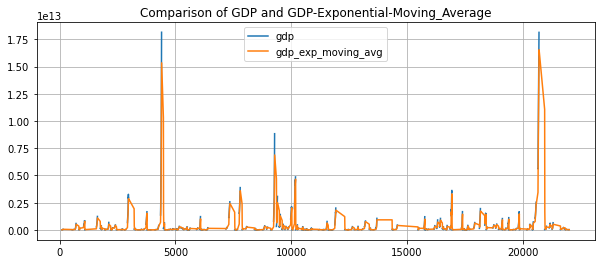

In [108]:
data[['gdp', 'gdp_exp_moving_avg']].plot(label='RELIANCE',figsize=(10, 4))
plt.title("Comparison of GDP and GDP-Exponential-Moving_Average")
plt.grid()
plt.show()

####  <span style="color:green"> The visualization leads us to conclude that the Exponential Moving Average effectively represents the original GDP values. </span>

In [109]:
# Replace NaN values in 'gdp' column with values from 'gdp_exp_moving_avg' column
data['gdp'] = data['gdp'].fillna(data['gdp_exp_moving_avg'])

In [110]:
data.isna().sum()

country                    0
year                       0
iso_code                  37
population                 0
gdp                        0
                          ..
wind_electricity           0
wind_energy_per_capita     0
wind_share_elec            0
wind_share_energy          0
gdp_exp_moving_avg         0
Length: 130, dtype: int64

### 4. Exploratory Data Analysis (EDA)

In [111]:
stacked_df = pd.DataFrame(data[["year","biofuel_share_elec","coal_share_elec","gas_share_elec","hydro_share_elec","low_carbon_share_elec",
                                "nuclear_share_elec","oil_share_elec","other_renewables_share_elec","solar_share_elec","wind_share_elec"]])

# Grouping the stacked_df

A = stacked_df.groupby('year')[["biofuel_share_elec","coal_share_elec","gas_share_elec","hydro_share_elec","low_carbon_share_elec",
                                "nuclear_share_elec","oil_share_elec","other_renewables_share_elec","solar_share_elec","wind_share_elec"]].sum()

In [112]:
fig = px.bar(A, 
             x=A.index,
             y=["biofuel_share_elec","coal_share_elec","gas_share_elec","hydro_share_elec","low_carbon_share_elec",
                "nuclear_share_elec","oil_share_elec","other_renewables_share_elec","solar_share_elec","wind_share_elec"],
             title="Share of electricity generation by different source across years",
             labels={"value": "Share of Electricity Generation", "variable": "Energy Source", "year": "Year"},
             barmode='stack'
            )

fig.show()


#### <span style="color:green"> Over the years, there has been a clear upward trend in electricity generation capacities, which may be attributed to the following factors: </span>

1. Adoption of technology from more developed countries.
2. Increased focus on renewable energy sources, leading to these sudden spikes.

<span style="color:green"> Additionally, the instances of sudden increases observed in the visualization could be due to inaccuracies in the data collection process. </span>

In [113]:
from plotly.subplots import make_subplots

# Assuming you have the 'B' DataFrame as described in your code

B = data.groupby('year')[['fossil_share_energy','renewables_share_energy','nuclear_share_energy']].mean().reset_index()
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'pie'}]])



# Assuming you have the 'B' DataFrame as described in your code

# Create subplots with one pie chart
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'pie'}]])

# Loop through each year from 1992 to 2022
for year in range(1992, 2023):
    # Filter data for the current year
    filtered_df = B[B['year'] == year]
    
    # Add a pie trace for the current year
    fig.add_trace(go.Pie(
                    labels=['Fossil', 'Renewable', 'Nuclear'],
                    values=[filtered_df['fossil_share_energy'].values[0],
                            filtered_df['renewables_share_energy'].values[0],
                            filtered_df['nuclear_share_energy'].values[0]],
                    textinfo='label+percent', hole=.3))

# Define slider steps for each year
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{'visible': [False] * len(fig.data)},
              {'title_text': f'{2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
        label=str(1992 + i)
    )
    step['args'][0]['visible'][i] = True
    steps.append(step)

# Make the first trace visible by default
fig.data[0].visible = True

# Update layout with title, slider, and formatting
fig.update_layout(
    title_text=f'Share of Electricity Generated',
    title_font_size=24,
    title_x=0.5,
    sliders=[dict(
        active=0,
        currentvalue={"prefix": "Year: "},
        pad={"t": 50},
        steps=steps
    )],
    height=500,
    width=1000,
    font=dict(family='Arial', size=12),
    margin=dict(t=80, l=50, r=50, b=50)
)

# Show the plot
fig.show()


#### <span style="color:green">An examination of the distribution over the years reveals a clear trend towards an increased focus and inclination for generating energy from renewable sources. </span>

In [114]:

def sparklines(ascending=False):
    # Assuming you have the 'data' DataFrame as described in your code

    # Select relevant columns
    D = data[['electricity_generation', 'electricity_demand', 'year', 'country', 'energy_per_capita', 'population']]

    # Group by country and calculate the mean population, select top/bottom 5
    A = data.groupby('country')['population'].mean().reset_index().sort_values(by='population', ascending=ascending).head()['country'].tolist()

    # Filter data based on conditions
    D = D[(D['electricity_demand'] != 0) & (D['country'].isin(A))]

    # Generate sparklines plot
    title = "Energy Per Capita of Top 5 countries population wise" if not ascending else "Energy Per Capita of Bottom 5 countries population wise"
    fig = px.line(D, x="year", y="energy_per_capita", facet_row="country", color='country', symbol="country",
                  facet_row_spacing=0.01, height=400, width=700, title=title)

    # Adjust layout
    fig.update_yaxes(visible=True, fixedrange=True, nticks=2, showgrid=False, zeroline=False, title=None)
    fig.update_layout(annotations=[], overwrite=True, showlegend=True, plot_bgcolor="black", margin=dict(t=35, l=10, b=10, r=10))
    fig.show(config=dict(displayModeBar=False))


In [115]:
sparklines() 

In [116]:
sparklines(True)   

#### <span style="color:green"> Upon observing the y-axis positioning of the sparklines, a twofold difference in values is noted between the TOP-5 and BOTTOM-5. It can be concluded that countries with larger populations tend to have lower energy_per_capita, and conversely, countries with smaller populations exhibit higher energy_per_capita.</span>

In [117]:
E = data[data['year']>=2000].groupby(['year','country'])[['electricity_demand','electricity_generation']].mean().reset_index()
E['ratio'] = E['electricity_generation']/E['electricity_demand']

E['electricity_demand'] = E['electricity_demand'].mask(E.electricity_demand == 0, 1)
E['electricity_demand'] = np.log(E['electricity_demand'])
E['electricity_demand'] = E['electricity_demand'].mask((E.electricity_demand <= 0 | E.electricity_demand.isna()), 0)


E['electricity_generation'] = E['electricity_generation'].mask(E.electricity_generation == 0, 1)
E['electricity_generation'] = np.log(E['electricity_generation'])
E['electricity_generation'] = E['electricity_generation'].mask((E.electricity_generation <= 0 | E.electricity_generation.isna()), 0)

In [118]:
# fig = px.scatter(E,x= 'electricity_demand', y = 'electricity_generation',color = "year")

fig = px.scatter(E,x = 'electricity_demand', y = 'electricity_generation',
                 animation_frame = 'country',color = 'year',title = 'Correlation between Electricity Generation and Demand',size = abs(E.electricity_generation),
                 hover_name="country",  labels={'y':'Electricity Demand in terawatt-hours'},
                range_x=[-1,E.electricity_demand.max()], range_y=[-2,E.electricity_generation.max()])
fig.update_yaxes(visible=True, zeroline=False)

fig.update_layout(
        showlegend=True,
        plot_bgcolor="black")

fig.show()

#### <span style="color:green"> The visualization suggests that the demand and supply of electricity have been steadily increasing over the years. Interestingly, in more developed nations such as the USA, Canada, UK, and France, there hasn't been a significant surge in demand or generation capacity, with values remaining relatively stable over several years.</span>
<span style="color:green"> This pattern is also observed in smaller European countries like Norway, the Netherlands, North Macedonia, Serbia, and Luxembourg.<span style="color:green"> In contrast, countries with emerging economies, including India, China, Argentina, and Israel, have exhibited a sharp upward trend.

In [119]:
F = data[data.year >= 2000].groupby('year')[['greenhouse_gas_emissions','fossil_electricity']].mean().reset_index()

g1 = go.Bar(x=F.year, y=F.fossil_electricity, name = "Fossil Electricity",  marker_color='goldenrod')
# Create a line chart
g2 = go.Bar(x=F.year, y=F.greenhouse_gas_emissions, name = "greenhouse_gas_emissions",marker_color='burlywood')

fig = go.Figure(data=[g1,g2])

fig.update_layout(barmode='relative',title_text = "Electricity Generated by Fossils & Emissions of Greenhouse Gas",
        showlegend=True,
        plot_bgcolor="black")
fig.show()

 #### <span style="color:green"> Inspite of many measures and regulations, the greenhouse gas emissions has relatively grown over the past couple of decades which suggests there is a need for shifting focus on more renewable sources for energy generation.</span>

In [120]:
G = data.groupby(['year','country']).renewables_share_elec.mean().reset_index()

fig = px.line(G,x='year',y='renewables_share_elec',animation_frame='country', color_discrete_sequence=['gold'], markers=True,
        title = "Year on Year growth in Share of electricity generated by renewables")

fig.update_layout(plot_bgcolor="black")

#### With continuous advancements and focus of International groups and countries to promote renewable sources as the primary sources of energy, many countries are continuously increasing their focus to renewable sources for the energy securities of their respective states.

<span style="color:green">  we saw in the previous chart that greenhouse gas emission is still increasing inspite the fact that companies started to adapt more and more renewable sources for electricity generation. Hopefully if the trend continuous, maybe in a couple of decades, we can minimize this greenhouse gas emissions caused by electricity generation.

Now, we have basic understanding of our data, so moving ahead, we should look at computing more complex tasks : 

## Classifying countries based on their energy security and self-sufficiency

- Target label: A categorical label representing different levels of energy self-sufficiency (e.g., "High Self-Sufficiency," "Moderate Self-Sufficiency," "Low Self-Sufficiency").
- Rationale: This classification task could help identify countries that are heavily reliant on energy imports and potential areas for increasing domestic energy production or diversification.

### 5. Data Preprocessing 

In [121]:
# Creating a ratio that gives us an estimate of how much energy is being primarily consumed divided by 
# the total of power produced from different sources at a time

data['energy_production_ratio'] =  data['primary_energy_consumption'] /(data['coal_consumption']+ 
                                                                        data['oil_consumption'] + 
                                                                        data['gas_consumption'] + 
                                                                        data['renewables_consumption']+ 
                                                                        data['nuclear_consumption'])

#### Columns like net_elec_imports_share_demand, energy_production_ratio, various types of energy production values, per_capita energy generation values can help in building a better model, hence we need to drop the rest of the columns and more closely observe features which are of greater significance for us.

In [122]:

ls = ['change_pct','change_twh','share_elec','_electricity',
      'carbon_intensity_elec','elec_per_capita','prod_per_capita','electricity_demand','electricity_generation',
     'energy_per_gdp','fossil_electricity','greenhouse_gas_emissions','other_renewable_exc_biofuel_electricity',
     'other_renewables_elec_per_capita_exc_biofuel','other_renewables_share_elec_exc_biofuel','iso_code',
     ]

unnec = []

# Loop through unique column names in the DataFrame
for i in data.columns.unique():
    # Check if the last 10 characters of the column name match any suffix in the list
    if i[-10:] in ls:
        unnec.append(i)
    # Check if the last 12 characters of the column name match any suffix in the list
    elif i[-12:] in ls:
        unnec.append(i)
    # Check if the last 15 characters of the column name match any suffix in the list, or the column name is directly in the list
    elif i[-15:] in ls or i in ls:
        unnec.append(i)

# Drop the columns identified as unnecessary
data1 = data.drop(unnec, axis=1)

In [123]:
data1.head()

country  year  population           gdp  biofuel_cons_per_capita   
97   Afghanistan  1974  11869881.0  1.430911e+10                      0.0  \
98   Afghanistan  1975  12157390.0  1.517777e+10                      0.0   
99   Afghanistan  1976  12425276.0  1.602361e+10                      0.0   
100  Afghanistan  1977  12687308.0  1.520736e+10                      0.0   
101  Afghanistan  1978  12938864.0  1.633783e+10                      0.0   

     biofuel_consumption  biofuel_share_energy  coal_cons_per_capita   
97                   0.0                   0.0                   0.0  \
98                   0.0                   0.0                   0.0   
99                   0.0                   0.0                   0.0   
100                  0.0                   0.0                   0.0   
101                  0.0                   0.0                   0.0   

     coal_consumption  coal_production  ...  renewables_energy_per_capita   
97                0.0            0.936  ...                           0.0  \
98                0.0            1.221  ...                           0.0   
99                0.0            1.303  ...                           0.0   
100               0.0            1.384  ...                           0.0   
101               0.0            1.775  ...                           0.0   

     renewables_share_energy  solar_consumption  solar_energy_per_capita   
97                       0.0                0.0                      0.0  \
98                       0.0                0.0                      0.0   
99                       0.0                0.0                      0.0   
100                      0.0                0.0                      0.0   
101                      0.0                0.0                      0.0   

     solar_share_energy  wind_consumption  wind_energy_per_capita   
97                  0.0               0.0                     0.0  \
98                  0.0               0.0                     0.0   
99                  0.0               0.0                     0.0   
100                 0.0               0.0                     0.0   
101                 0.0               0.0                     0.0   

     wind_share_energy  gdp_exp_moving_avg  energy_production_ratio  
97                 0.0        1.430911e+10                      NaN  
98                 0.0        1.478687e+10                      NaN  
99                 0.0        1.528403e+10                      NaN  
100                0.0        1.525877e+10                      NaN  
101                0.0        1.556854e+10                      NaN  

[5 rows x 50 columns]

Our Energy-Production-Ratio contains many Null, infinity and -infinity values, so we need to replace those with more sensible values

In [124]:
# Replace NaN and negative infinity values with 0 in the 'energy_production_ratio' column
data1.loc[data1['energy_production_ratio'].isin([np.nan, -np.inf]), 'energy_production_ratio'] = 0

# Replace positive infinity values with the maximum value in the column
# First, replace positive infinity with NaN to find the maximum value excluding infinity
max_value = data1['energy_production_ratio'].replace([np.inf], np.nan).max()
# Then, replace NaN in 'energy_production_ratio' column with the maximum value
data1.loc[data1['energy_production_ratio'] == np.inf, 'energy_production_ratio'] = max_value


In [125]:
data1[['net_elec_imports_share_demand','energy_production_ratio']].describe().T

count      mean        std      min  25%   
net_elec_imports_share_demand  7362.0  0.899984  34.558107 -844.207  0.0  \
energy_production_ratio        7362.0  1.008433   0.193090    0.000  1.0   

                                    50%       75%         max  
net_elec_imports_share_demand  0.000000  0.000000  100.000000  
energy_production_ratio        1.000007  1.090615    1.090615

In [126]:
#data1.describe().T

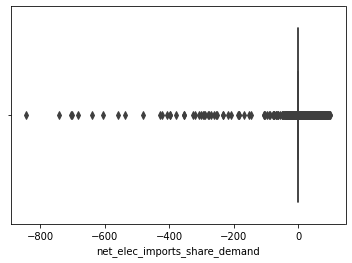

In [127]:
# To understand the distribution more clearly

sns.boxplot(x = data1['net_elec_imports_share_demand']);

There are way too many zero's in the dataset but it is quite understandable because many countries do not have enough resources or inhouse facilities to generate energy, or produce different kind of sources that are key for energy generation or might they are not very economically strong to setup plants for energy generation or are less technically advanced.

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV, cross_validate, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import KNNImputer

In [129]:
# Creating a list called 'scaling' of all the columns of object(not numbers) data type excluding the year column

data1.select_dtypes(exclude = 'object').columns.to_list()

scaling = [] + data1.select_dtypes(exclude = 'object').columns.to_list()[1:]

In [130]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler

# Pipeline object to demonstrate sequential processing

pipe = Pipeline([("minmaxscale",MinMaxScaler())])

# Column Transformers to apply a set of transformation to specifically mentioned columns parallely and concatenates the 
# transformed outputs from different transformations into a single matrix.

Ct = ColumnTransformer([('pipe',pipe,scaling),  # Applying MinMaxScaler to columns in 'scaling'
                       ('ss',StandardScaler(),['year'])], # Applying StandardScaler to 'year' column
                       remainder = 'passthrough', verbose_feature_names_out= False) # Remaining columns will not be transformed

data1_transformed = Ct.fit_transform(data1)


In [131]:
# Extracting column names except the first two columns

cols = list(data1.columns.unique())[2:]

# Creating a DataFrame with transformed data

df1 = pd.DataFrame(data1_transformed,columns = cols + ['year','country'])

Our target will be significantly impacted by two columns:
1. Our self-generated column `energy_production_ratio`
2. `net_elec_imports_share_demand`

We need to establish a rationale for the values of these columns as they are inversely related. A higher value in the `energy_production_ratio` column indicates a country's self-sufficiency in energy production, while a higher value in the `net_elec_imports_share_demand` column suggests a dependency on external sources for a country's energy requirements.

For this task, let us look at different percentile values of both of these columns and try to establish a threshold so that class distribution can project the actual distribution of self-sufficiency of world countries.

In [132]:
# Printing percentiles for 'energy_production_ratio'

for i in range(1,101):
    print(f"energy_production_ratio at percentile {i} is {(np.percentile(df1['energy_production_ratio'],i)):.7f}")

energy_production_ratio at percentile 1 is 0.0000000
energy_production_ratio at percentile 2 is 0.0000000
energy_production_ratio at percentile 3 is 0.0000000
energy_production_ratio at percentile 4 is 0.9168990
energy_production_ratio at percentile 5 is 0.9169062
energy_production_ratio at percentile 6 is 0.9169090
energy_production_ratio at percentile 7 is 0.9169103
energy_production_ratio at percentile 8 is 0.9169112
energy_production_ratio at percentile 9 is 0.9169121
energy_production_ratio at percentile 10 is 0.9169127
energy_production_ratio at percentile 11 is 0.9169131
energy_production_ratio at percentile 12 is 0.9169134
energy_production_ratio at percentile 13 is 0.9169135
energy_production_ratio at percentile 14 is 0.9169135
energy_production_ratio at percentile 15 is 0.9169135
energy_production_ratio at percentile 16 is 0.9169135
energy_production_ratio at percentile 17 is 0.9169135
energy_production_ratio at percentile 18 is 0.9169135
energy_production_ratio at percentile

In [133]:
# Printing percentiles for 'net_elec_imports_share_demand'

for i in range(1,101):
    print(f"net_elec_imports_share_demand at percentile {i} is {(np.percentile(df1['net_elec_imports_share_demand'],i)):.9f}")

net_elec_imports_share_demand at percentile 1 is 0.855715315
net_elec_imports_share_demand at percentile 2 is 0.871643993
net_elec_imports_share_demand at percentile 3 is 0.877531421
net_elec_imports_share_demand at percentile 4 is 0.881011346
net_elec_imports_share_demand at percentile 5 is 0.883895798
net_elec_imports_share_demand at percentile 6 is 0.885714277
net_elec_imports_share_demand at percentile 7 is 0.887971282
net_elec_imports_share_demand at percentile 8 is 0.889432847
net_elec_imports_share_demand at percentile 9 is 0.890620881
net_elec_imports_share_demand at percentile 10 is 0.891689746
net_elec_imports_share_demand at percentile 11 is 0.892387527
net_elec_imports_share_demand at percentile 12 is 0.892917252
net_elec_imports_share_demand at percentile 13 is 0.893283697
net_elec_imports_share_demand at percentile 14 is 0.893614197
net_elec_imports_share_demand at percentile 15 is 0.893865169
net_elec_imports_share_demand at percentile 16 is 0.894008157
net_elec_imports_

In [134]:
df1[df1['net_elec_imports_share_demand']<=0.906130859][['energy_production_ratio','net_elec_imports_share_demand']].sort_values(by = ['energy_production_ratio','net_elec_imports_share_demand'],ascending = [False,True])

energy_production_ratio net_elec_imports_share_demand
5269                     1.0                           0.0
5272                     1.0                      0.108382
5273                     1.0                      0.149253
5271                     1.0                      0.151662
5270                     1.0                      0.170656
...                      ...                           ...
5830                     0.0                      0.901243
5811                     0.0                      0.902066
2157                     0.0                      0.902533
5808                     0.0                       0.90321
5809                     0.0                      0.905778

[6625 rows x 2 columns]

In [135]:
# Creating Target Column
# Assigning initial value 'Unknown' to the 'target' column

df1['target'] = 'Unknown'

# High Self-Sufficiency
mask = ((df1['net_elec_imports_share_demand'] <= 0.894) & (df1['energy_production_ratio'] >= 0.0000842))
df1.loc[mask, 'target'] = 'High Self-Sufficiency'

# Moderate Self-Sufficiency
mask = (df1['net_elec_imports_share_demand'].between(0.894,1)) & (df1['energy_production_ratio'].between(0.0000120,1))
df1.loc[mask, 'target'] = 'Moderate Self-Sufficiency'

# Low Self-Sufficiency
mask = (df1['net_elec_imports_share_demand'] > 0.894090) & (df1['energy_production_ratio'] <= 0.0000120)
df1.loc[mask, 'target'] = 'Low Self-Sufficiency'

In [136]:
# Filtering rows with 'target' as 'Unknown' and sorting by certain columns

df1[df1.target == 'Unknown'][['energy_production_ratio','net_elec_imports_share_demand','target']].sort_values(['energy_production_ratio','net_elec_imports_share_demand'],ascending = [False,True])

energy_production_ratio net_elec_imports_share_demand   target
763                      0.0                      0.870093  Unknown
5799                     0.0                        0.8873  Unknown
5813                     0.0                      0.888034  Unknown
1547                     0.0                      0.888065  Unknown
5798                     0.0                      0.888301  Unknown
5802                     0.0                      0.889614  Unknown
5801                     0.0                      0.890434  Unknown
6704                     0.0                      0.890973  Unknown
5803                     0.0                      0.892758  Unknown
5800                     0.0                      0.892841  Unknown
5812                     0.0                      0.893317  Unknown

In [137]:
# There are still many Unknowns, lets check the distribution
df1.target.value_counts()

target
Moderate Self-Sufficiency    5953
High Self-Sufficiency        1162
Low Self-Sufficiency          236
Unknown                        11
Name: count, dtype: int64

In [138]:
from sklearn.preprocessing import OrdinalEncoder

In [139]:
# Using OrdinalEncoder,converting labels into numbers and then using KNNImputer which uses k-nearest neighbours approach to fill missing values in dataset

#?Pipeline
# pipe2 = Pipeline([('ord',OrdinalEncoder()),
#                  ('knn',KNNImputer(missing_values=3,n_neighbors= 5, weights='distance'))
#                  ])

# df1.target = pipe2.fit_transform(np.array(df1.target).reshape(-1,1))

df1['target'] = df1['target'].replace({"Low Self-Sufficiency":0, 
                                       "Moderate Self-Sufficiency":1, 
                                       "High Self-Sufficiency":2, 
                                       "Unknown":3})
knn_imputer = KNNImputer(missing_values=3,n_neighbors= 5, weights='distance')
df1.target = knn_imputer.fit_transform(np.array(df1.target).reshape(-1,1))



In [140]:
# Seems like unknown values are closer to low self sufficiency values, hence mapping them to same 

df1.loc[~df1.target.isin([0,1,2]),'target'] = (df1.loc[~df1.target.isin([0,1,2]),'target']).astype(int)
df1.target.value_counts()

target
1.0    5964
2.0    1162
0.0     236
Name: count, dtype: int64

In [141]:
# Since the model will only accept numeric values in label, we will use label encoder to encode every class to a specific number
# For Example 
# Moderate Self-Sufficiency - > 2
# Low Self-Sufficiency - > 1 
# High Self-Sufficiency -> 0

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['country'] = le.fit_transform(df1['country'])

In [142]:
# Although the target label is now encoded, it creates a sort of order which when an algorithm is getting trained, will consider as actual values
# To overcome this challenge, we use One-Hot Vectors which creates an array of size corresponding to the number of classes with value 1 for actual class and 0 for rest
# For Example = 
# 1 - > [1,0,0]
# 2 - > [0,1,0]
# 3 - > [0,0,1]

ohe = OneHotEncoder()

df1.country = ohe.fit_transform(np.array(df1.country).reshape(-1,1))

In [143]:
df1.country = df1.country.toarray()

### Handling Unbalanced labels

In [144]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

Before SMOTE: Counter({1.0: 5964, 2.0: 1162, 0.0: 236})


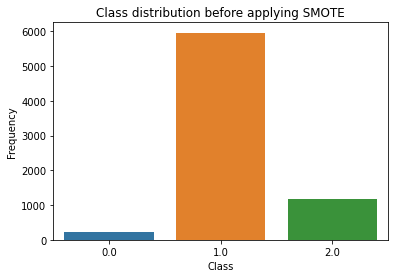

Number of Clients in class 1.0: 5964
Number of Clients in class 2.0: 1162
Number of Clients in class 0.0: 236


In [145]:
counter = Counter(y)

print("Before SMOTE:", counter)

# Visualize the new class distribution
sns.countplot(x=y, label="Count")
plt.title('Class distribution before applying SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Print the counts for each class after SMOTE
value_counts_resampled = pd.Series(y).value_counts()
for label, count in value_counts_resampled.items():
    print(f'Number of Clients in class {label}: {count}')
    
    

As we can see from the plot that data is highly imbalanced. 

To avoid this we will apply oversamplying technique SMOTE

Before SMOTE: Counter({1.0: 5964, 2.0: 1162, 0.0: 236})
After SMOTE: Counter({0.0: 5964, 1.0: 5964, 2.0: 5964})


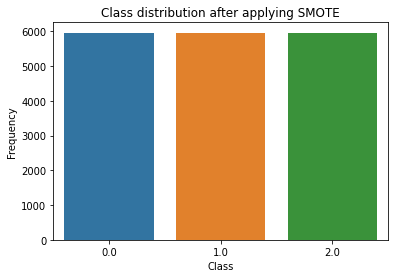

Number of Clients in class 0.0: 5964
Number of Clients in class 1.0: 5964
Number of Clients in class 2.0: 5964


In [146]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Example data (replace this with your actual data)
# x, y = make_classification(n_samples=10000, n_features=2, n_classes=3, n_clusters_per_class=1, weights=[0.05, 0.15, 0.8], random_state=1)
# Assuming x is your feature set and y is your target

# Initial class distribution
counter = Counter(y)
print("Before SMOTE:", counter)

# Apply SMOTE
oversample = SMOTE(random_state=42)
x_resampled, y_resampled = oversample.fit_resample(x, y)

# New class distribution
counter_resampled = Counter(y_resampled)
print("After SMOTE:", counter_resampled)

# Visualize the new class distribution
sns.countplot(x=y_resampled, label="Count")
plt.title('Class distribution after applying SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Print the counts for each class after SMOTE
value_counts_resampled = pd.Series(y_resampled).value_counts()
for label, count in value_counts_resampled.items():
    print(f'Number of Clients in class {label}: {count}')
    
    


	
After applying SMOTE, we can see that data is balanced

In [147]:
# x,y =train_test_split(df1, test_size=0.25, random_state=25)

In [148]:
# df1_train_x = x.iloc[:,:-1]
# df1_train_y = x.iloc[:,-1]

# df1_test_x = y.iloc[:,:-1]
# df1_test_y = y.iloc[:,-1]

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
# let us now split the dataset into train & test
df1_train_x, df1_test_x, df1_train_y, df1_test_y = train_test_split(x_resampled, y_resampled, test_size = 0.30, random_state=42)

In [151]:
print(df1_train_x.shape)
print(df1_train_y.shape)
print(df1_test_x.shape)
print(df1_test_y.shape)

(12524, 50)
(12524,)
(5368, 50)
(5368,)


# Data Modelling

### LogisticRegression

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
# Create logistic regression
logistic = LogisticRegression()

In [154]:
logistic.fit(df1_train_x,df1_train_y)

LogisticRegression()

In [155]:
y_pred = logistic.predict(df1_test_x)

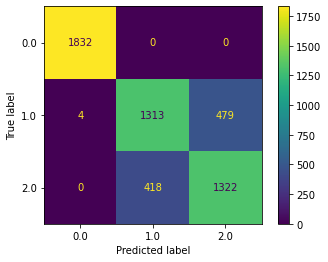

In [156]:
from sklearn.metrics import confusion_matrix
ConfusionMatrixDisplay.from_predictions(df1_test_y,y_pred)

In [157]:
from sklearn.metrics import classification_report
# accuracy measures by classification_report()
result = classification_report(df1_test_y,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1832
         1.0       0.76      0.73      0.74      1796
         2.0       0.73      0.76      0.75      1740

    accuracy                           0.83      5368
   macro avg       0.83      0.83      0.83      5368
weighted avg       0.83      0.83      0.83      5368



#### Hyperparameter Tuning of Logistic Regression

In [158]:
grid = {'max_iter' : [100,1000,10000], 'tol' : [1e-4,1e-3,1e-5], 'penalty' : ['l1','l2','elasticnet']}

grid_logics = GridSearchCV(logistic, param_grid = grid, scoring = 'f1_micro',cv = 5, n_jobs = -1) # have used micro because my label is a multiclass onehot vector

grid_logics.fit(df1_train_x, df1_train_y)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [100, 1000, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'tol': [0.0001, 0.001, 1e-05]},
             scoring='f1_micro')

In [159]:
best_log = grid_logics.best_estimator_    # To get the model with best parameters
best_log.fit(df1_train_x, df1_train_y)

LogisticRegression(max_iter=10000, tol=1e-05)

In [160]:
# Getting Scores on train and test sets
print(best_log.score(df1_train_x, df1_train_y))
print(best_log.score(df1_test_x, df1_test_y))

0.8989140849568827
0.8979135618479881


In [161]:
best_log_predict = best_log.predict(df1_test_x)

In [162]:
from sklearn.metrics import f1_score, confusion_matrix
f1_score(df1_test_y,best_log_predict, average='micro')

0.8979135618479881

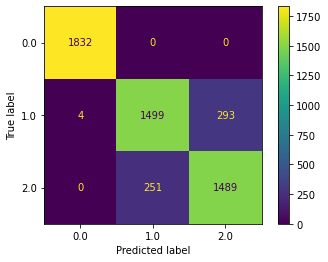

In [163]:
ConfusionMatrixDisplay.from_predictions(df1_test_y, best_log_predict)

In [164]:
from sklearn.metrics import classification_report
# accuracy measures by classification_report()
result = classification_report(df1_test_y,best_log_predict)

# print the result
print(result)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1832
         1.0       0.86      0.83      0.85      1796
         2.0       0.84      0.86      0.85      1740

    accuracy                           0.90      5368
   macro avg       0.90      0.90      0.90      5368
weighted avg       0.90      0.90      0.90      5368



## Let's Try Feature Engineering that might help yield better results

In [165]:
from sklearn.feature_selection import RFE

selector = RFE(best_log, n_features_to_select = 25, step=1)
new_train_x = df1_train_x
selector = selector.fit(new_train_x, df1_train_y)
print(f'Rank of each feature is : {selector.support_}')

Rank of each feature is : [ True False False False  True  True False False False  True  True  True
 False  True False False False False False  True  True False False False
  True  True  True False  True False  True  True  True False  True  True
  True False False False False  True  True  True  True False False  True
  True False]


In [166]:
new_train_x = selector.transform(df1_train_x)
logistic.fit(new_train_x, df1_train_y)
print(logistic.score(new_train_x, df1_train_y))

0.8985946981794953


### <span style = 'color:red'>The below code might take some time to process </span>

In [167]:
from sklearn.feature_selection import RFECV

selector = RFECV(logistic, step=1)
new_train_x = df1_train_x
selector = selector.fit(new_train_x, df1_train_y)
print(f'Rank of each feature is : {selector.support_}')

Rank of each feature is : [ True False False False  True  True False False False  True  True  True
 False  True False False False False False  True  True False False False
  True  True  True False  True False  True  True  True False  True  True
  True False False False False  True  True  True  True False False  True
  True False]


In [168]:
print(f"No of features selected for modeling are : {len(list(filter(lambda x: x + 1 if x == 1 else False ,selector.ranking_)))}")
new_train_x = selector.transform(df1_train_x)
best_log.fit(new_train_x, df1_train_y)
print(best_log.score(new_train_x, df1_train_y))

No of features selected for modeling are : 25
0.8989939316512296


In [169]:
# before proceeding, we need to fit the best estimator on original df1_train_x, 
#so that it remembers weights for original df1_train_x and retains its shape

best_log.fit(df1_train_x, df1_train_y)

LogisticRegression(max_iter=10000, tol=1e-05)

In [170]:
# To check key metrics of our model

from sklearn.metrics import classification_report
print(classification_report(df1_test_y, best_log.predict(df1_test_x)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1832
         1.0       0.86      0.83      0.85      1796
         2.0       0.84      0.86      0.85      1740

    accuracy                           0.90      5368
   macro avg       0.90      0.90      0.90      5368
weighted avg       0.90      0.90      0.90      5368



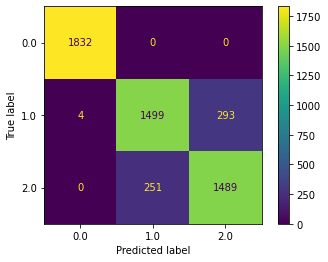

In [171]:
ConfusionMatrixDisplay.from_predictions(df1_test_y, best_log.predict(df1_test_x))

In [172]:
# import pandas as pd
from sklearn import metrics

# Example predictions (replace these with your actual predictions)
# df1_test_y = [1, 0, 1, 1, 0]  # Actual labels
# y_pred = [1, 0, 1, 0, 0]  # Predicted labels

# Create a DataFrame to tabulate results
result_tabulation = pd.DataFrame(columns=['Model', 'Precision Score', 'Recall Score', 'Accuracy Score', 'f1-score'])

# Calculate metrics for multiclass classification
Bagging_Meta_estimator = pd.Series({
    'Model': "Logistic Regression",
    # Calculate AUC score using one-vs-rest approach for multiclass
    #'AUC Score': metrics.roc_auc_score(df1_test_y, y_pred, multi_class='ovr'),
    'Precision Score': metrics.precision_score(df1_test_y, best_log.predict(df1_test_x), average='macro'),
    'Recall Score': metrics.recall_score(df1_test_y, best_log.predict(df1_test_x), average='macro'),
    'Accuracy Score': metrics.accuracy_score(df1_test_y, best_log.predict(df1_test_x)),
    'f1-score': metrics.f1_score(df1_test_y, best_log.predict(df1_test_x), average='macro')
})

# Convert the Series to a DataFrame
Bagging_Meta_estimator_df = Bagging_Meta_estimator.to_frame().T  # Transpose to make it a single row DataFrame

# Append the results to the result_tabulation DataFrame
result_tabulation = pd.concat([result_tabulation,Bagging_Meta_estimator_df], ignore_index=True)

print(result_tabulation)


                 Model Precision Score Recall Score Accuracy Score  f1-score
0  Logistic Regression        0.896657     0.896793       0.897914  0.896637


### DecisionTreeClassifier

In [302]:
from sklearn.tree import DecisionTreeClassifier
# build the model
DTclassifier = DecisionTreeClassifier(criterion="gini",random_state=10)

In [303]:
# fit the model
DTclassifier.fit(df1_train_x, df1_train_y)


DecisionTreeClassifier(random_state=10)

In [304]:
# predict the values
y_pred_DT  = DTclassifier.predict(df1_test_x)

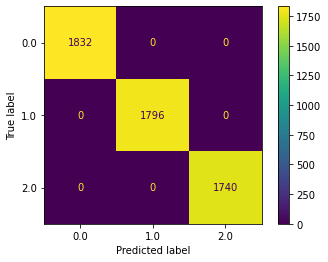

In [305]:
# compute the confusion matrix

ConfusionMatrixDisplay.from_predictions(df1_test_y,y_pred_DT)

In [306]:
# accuracy measures by classification_report()
result = classification_report(df1_test_y,y_pred_DT)

# print the result
print(result)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1832
         1.0       1.00      1.00      1.00      1796
         2.0       1.00      1.00      1.00      1740

    accuracy                           1.00      5368
   macro avg       1.00      1.00      1.00      5368
weighted avg       1.00      1.00      1.00      5368



In [307]:
import pandas as pd
from sklearn import metrics

# Example predictions (replace these with your actual predictions)
# df1_test_y = [1, 0, 1, 1, 0]  # Actual labels
# y_pred = [1, 0, 1, 0, 0]  # Predicted labels

# Create a DataFrame to tabulate results
result_tabulation = pd.DataFrame(columns=['Model', 'Precision Score', 'Recall Score', 'Accuracy Score', 'f1-score'])

# Calculate metrics for multiclass classification
DT_metrices = pd.Series({
    'Model': "Decision Tree",
    # Calculate AUC score using one-vs-rest approach for multiclass
    #'AUC Score': metrics.roc_auc_score(df1_test_y, y_pred, multi_class='ovr'),
    'Precision Score': metrics.precision_score(df1_test_y, y_pred_DT, average='macro'),
    'Recall Score': metrics.recall_score(df1_test_y, y_pred_DT, average='macro'),
    'Accuracy Score': metrics.accuracy_score(df1_test_y, y_pred_DT),
    'f1-score': metrics.f1_score(df1_test_y,y_pred_DT, average='macro')
})

# Convert the Series to a DataFrame
DT_metrices_df = DT_metrices.to_frame().T  # Transpose to make it a single row DataFrame

# Append the results to the result_tabulation DataFrame
result_tabulation = pd.concat([result_tabulation,DT_metrices_df], ignore_index=True)

print(result_tabulation)


           Model Precision Score Recall Score Accuracy Score f1-score
0  Decision Tree             1.0          1.0            1.0      1.0


In [308]:
result_tabulation

Model Precision Score Recall Score Accuracy Score f1-score
0  Decision Tree             1.0          1.0            1.0      1.0